# MiniNN Notebook 

7 décembre 2016

# Result:
Data set: MNIST

activation function: 
1. Rectified Linear Uni a = max(0,z) , f' = (a[a>0]->1)
2. softmax
3. sigmoid

with act func (1)
train acc: 0.96648

validation acc: 0.9473

Functions : forward, backward, update, etc in the file nn_ops.py

## Test Zone

### Load data and minibatch (as in miniNN.py)

In [1]:
# Pour ne pas reload le kernel quand un fichier .py change
%load_ext autoreload
%autoreload 2

%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import copy, math, time, sys
import dataset_loader
from nn_ops import *

In [2]:

# Retrieve the arguments 
args = parseArgs_ipython(arch = [100], act_func = "relu", batch_size = 500, eta = .01, n_epoch = 100)


In [3]:


# Fix the seed for the random generator
np.random.seed(seed=0)

#############################
### Dataset Handling
#############################

### Load the dataset
train_set, valid_set, test_set = dataset_loader.load_mnist()

### Define the dataset variables
n_training = train_set[0].shape[0]
n_feature = train_set[0].shape[1]
n_label = np.max(train_set[1])+1

#############################
### Neural Network parameters
#############################

### Activation function
act_func_name = args.act_func

### Network Architecture
nn_arch = np.array([n_feature] + args.arch + [n_label])

### Create the neural network
W,B,act_func,nb_params = initNetwork(nn_arch,act_func_name)

#############################
### Optimization parameters
#############################
eta = args.eta
batch_size = args.batch_size
n_batch = int(math.ceil(float(n_training)/batch_size))
n_epoch = args.n_epoch 

#############################
### Auxiliary variables
#############################
cumul_time = 0.

# Convert the labels to one-hot vector
one_hot = np.zeros((n_label,n_training))
one_hot[train_set[1],np.arange(n_training)]=1.

printDescription("Bprop", eta, nn_arch, act_func_name, batch_size, nb_params)

Description of the experiment
----------
Learning algorithm: Bprop
Initial step-size: 0.01
Network Architecture: [784 100  10]
Number of parameters: 79510
Minibatch size: 500
Activation: relu
----------


In [4]:
### Mini-batch creation
j = 0
batch, one_hot_batch, mini_batch_size = getMiniBatch(j, batch_size, train_set, one_hot)
X_bacth = batch

In [5]:
batch.shape

(500L, 784L)

### each fonction, with calculated values 

In [6]:
### Forward propagation
Y,Yp = forward(act_func, W, B, batch)


In [7]:
assert Y[0].shape == (n_feature, batch_size)
assert Y[-1].shape == (10, batch_size)

In [8]:
assert Yp[0].shape == (nn_arch[1], batch_size)

In [9]:

### Compute the softmax
out = softmax(Y[-1])
        
        

C:\Program Files\Anaconda2\lib\site-packages\numpy\core\_methods.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return umr_sum(a, axis, dtype, out, keepdims)


In [10]:
assert out.shape == (nn_arch[-1], batch_size)

In [11]:
### Compute the gradient at the top layer
derror = out-one_hot_batch

        

In [12]:
assert derror.shape == (nn_arch[-1], batch_size)

In [13]:
### Backpropagation
gradB = backward(derror, W, Yp)


In [14]:
assert len(gradB) == len(nn_arch)-1
for gradw,dim in zip(gradB,nn_arch[1:]):
    gradw.shape = (dim,batch_size)

In [15]:
### Update the parameters
new_W, new_B = update(eta, batch_size, W, B, gradB, Y)


In [16]:
### Training accuracy
train_loss, train_accuracy = computeLoss(W, B, train_set[0], train_set[1], act_func) 

### Valid accuracy
valid_loss, valid_accuracy = computeLoss(W, B, valid_set[0], valid_set[1], act_func) 


In [17]:
[train_accuracy, valid_accuracy]

[0.061879999999999998, 0.062199999999999998]

In [18]:
gradB

[array([[-0.94538333, -0.96341583,  1.10676098, ..., -1.90762797,
         -0.689435  , -0.59235028],
        [-0.        , -0.        , -0.        , ...,  0.        ,
          0.67769596,  0.        ],
        [ 0.87447799,  0.86614993,  1.21733754, ..., -0.88101135,
          2.53981916,  0.02773249],
        ..., 
        [ 1.33807552,  1.34559832,  2.42376146, ...,  0.79582463,
          1.63330237,  0.95396128],
        [-0.43778557, -0.        , -0.        , ..., -1.35072294,
         -1.87203602, -1.04154691],
        [ 0.        ,  0.        ,  2.58826832, ..., -0.        ,
         -0.        , -0.16207887]]),
 array([[  4.26236980e-036,   2.16895077e-075,   3.69791734e-025, ...,
           4.69893403e-038,   6.07133111e-041,   1.40606081e-021],
        [  9.45284153e-003,   1.29189419e-082,   9.99999994e-001, ...,
          -1.00000000e+000,   1.07489194e-025,   4.94266333e-012],
        [ -1.00000000e+000,  -1.00000000e+000,   4.41921863e-053, ...,
           1.64371442e-07

## Training

In [19]:
eta = 1
train_plot = []
valid_plot = []

for i in range(n_epoch):
    for j in range(n_batch):

        ### Mini-batch creation
        batch, one_hot_batch, mini_batch_size = getMiniBatch(j, batch_size, train_set, one_hot)

        prev_time = time.clock()

        ### Forward propagation
        Y,Yp = forward(act_func, W, B, batch)

        ### Compute the softmax
        out = softmax(Y[-1])
        
        ### Compute the gradient at the top layer
        derror = out-one_hot_batch

        ### Backpropagation
        gradB = backward(derror, W, Yp)

        ### Update the parameters
        W, B = update(eta, batch_size, W, B, gradB, Y)

        curr_time = time.clock()
        cumul_time += curr_time - prev_time

    ### Training accuracy
    train_loss, train_accuracy = computeLoss(W, B, train_set[0], train_set[1], act_func) 

    ### Valid accuracy
    valid_loss, valid_accuracy = computeLoss(W, B, valid_set[0], valid_set[1], act_func) 

    result_line = str(i) + " " + str(cumul_time) + " " + str(train_loss) + " " + str(train_accuracy) + " " + str(valid_loss) + " " + str(valid_accuracy) + " " + str(eta)

    print(result_line)
    
    train_plot.append([train_loss, train_accuracy])
    valid_plot.append([valid_loss, valid_accuracy])

0 1.2477868366 1.35754162957 0.66136 1.29441347623 0.6703 1
1 2.5069904637 0.830530765597 0.79184 0.795602915167 0.8023 1
2 3.7764434984 0.669324678727 0.82854 0.64738756728 0.8394 1
3 5.06189494446 0.589809224979 0.84838 0.579424574595 0.8551 1
4 6.57996528196 0.516451294674 0.86362 0.510958560364 0.8712 1
5 8.04168574374 0.462679623172 0.87774 0.466872485869 0.887 1
6 9.39961533484 0.42244895034 0.88648 0.433867281245 0.8955 1
7 10.4556675636 0.394773948775 0.89376 0.412806593624 0.9012 1
8 11.7014534274 0.377458855993 0.89906 0.39957180657 0.9057 1
9 12.8834759093 0.36340051773 0.90238 0.389601071451 0.9072 1
10 13.9331570657 0.346265819114 0.90648 0.376562844359 0.9102 1
11 15.1360402694 0.332874476969 0.90908 0.366455217577 0.9137 1
12 16.5675832586 0.31982417272 0.91206 0.356926987966 0.9158 1
13 18.0058958191 0.30746770139 0.91494 0.347933006451 0.9181 1
14 19.2911986648 0.297544538326 0.91736 0.341090541864 0.9187 1
15 20.5808100281 0.288257329643 0.91938 0.334474357736 0.9201 

# Result:
Data set: MNIST

activation function: Rectified Linear Uni a = max(0,z) , f' = (a[a>0]->1)

train acc: 0.96648

validation acc:0.9473

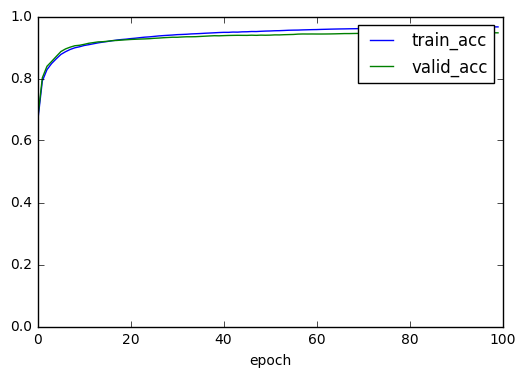

In [20]:
plt.plot(np.transpose(train_plot)[1],label='train_acc')
plt.plot(np.transpose(valid_plot)[1],label='valid_acc')
plt.xlabel("epoch")
plt.ylim([0.,1.])
plt.legend()